In [1]:
import os    
os.environ["OMP_NUM_THREADS"] = '1' 
import matplotlib
import firedrake as df
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
import ufl
import signal
from datetime import datetime
import json
from firedrake import *
import sys
import pickle
import h5py
import gzip
%matplotlib inline

/home/kayatroyer/firedrake/lib/python3.10/site-packages/pytools/persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Grounding Line Plotting

In [4]:
gl_run_title = str("Grounding Line Evolution Over Time CF=1.9")
gl_pkl_path = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_18__10_52_08.pkl.gz"
with gzip.open(gl_pkl_path, 'rb') as f:
    DATA_dict = pickle.load(f)
    

In [11]:
Hs_dict = DATA_dict['Hs_dict']
bed_dict=DATA_dict['bed_dict']

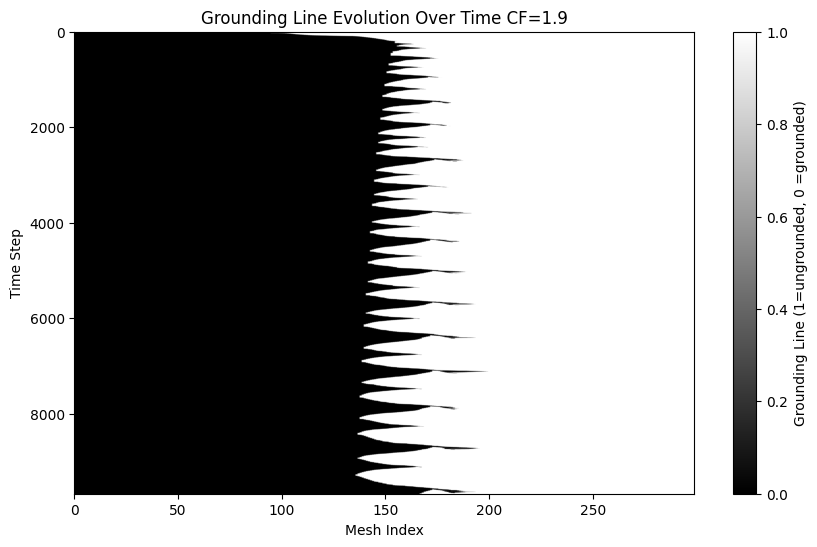

In [5]:
GL_dict = DATA_dict['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

plt.figure(figsize=(10, 6))
# plt.imshow(data_matrix.T, aspect='auto', cmap='gray', origin='lower', extent=[time[0], time[-1], mesh_indices[0], mesh_indices[-1]])
plt.imshow(data_matrix, aspect='auto', cmap='gray', origin='lower', extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]) 
plt.colorbar(label="Grounding Line (1=ungrounded, 0 =grounded)")
plt.ylabel("Time Step")
plt.xlabel("Mesh Index")
plt.gca().invert_yaxis()
plt.title(gl_run_title)
plt.show()

Thickness Plotting 

In [6]:
H_run_title = str("Thickness Evolution Over Time CF=1.9")
H_pkl_path = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_13__13_54_47.pkl.gz"
with gzip.open(H_pkl_path, 'rb') as f:
    DATA_dict2 = pickle.load(f)
    

In [8]:
H_dict = DATA_dict2['H_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([H_dict[t] for t in time])

plt.figure(figsize=(10, 6))
# plt.imshow(data_matrix.T, aspect='auto', cmap='gray', origin='lower', extent=[time[0], time[-1], mesh_indices[0], mesh_indices[-1]])
plt.imshow(data_matrix, aspect='auto', cmap='gray', origin='lower', extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]) 
plt.colorbar(label="Thickness")
plt.ylabel("Time Step")
plt.xlabel("Mesh Index")
plt.gca().invert_yaxis()
plt.title(H_run_title)
plt.show()

KeyError: 0.006562500000000001

Check if Dictionaries are the same/overwiting themselves


In [6]:
path = '/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_31__14_11_35.pkl.gz'
with gzip.open(path, 'rb') as f:
    DATA_dict2 = pickle.load(f)

In [7]:
bed_dict = DATA_dict2['bed_dict']
all_same = len(set(map(tuple, bed_dict.values()))) == 1
print(all_same)



True


MISC


In [ ]:
with gzip.open("/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_13__15_26_34.pkl.gz", 'rb') as f:
    DATA_dict2 = pickle.load(f)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

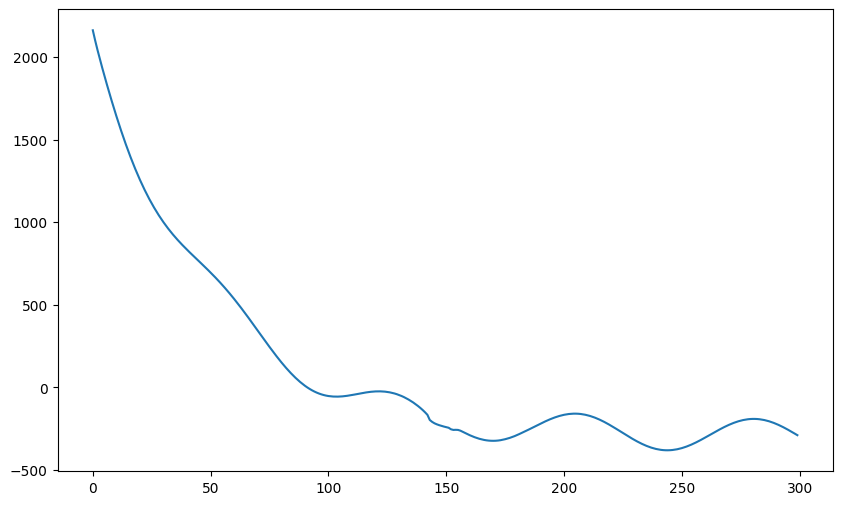

: 

In [ ]:
bed_dict = DATA_dict2['bed_dict']
time = 0
mesh_indices = np.arange(300)
data = np.array(bed_dict[time])

plt.figure(figsize=(10, 6))
# plt.imshow(data_matrix.T, aspect='auto', cmap='gray', origin='lower', extent=[time[0], time[-1], mesh_indices[0], mesh_indices[-1]])
plt.plot(mesh_indices, data, label=f'Timestep {time}')
plt.colorbar(label="Grounding Line (0=ungrounded, 1=grounded)")
plt.ylabel("Time Step")
plt.xlabel("Mesh Index")
plt.gca().invert_yaxis()
plt.title("Grounding Line Evolution Over Time - amplitude 0")
plt.show()

In [12]:
bed_dict = DATA_dict['bed_dict']
base_dict = DATA_dict['base_dict']
surf_dict = DATA_dict['surf_dict']
sed_dict = DATA_dict['sed_dict']
H_dict = DATA_dict['H_dict']
us_dict = DATA_dict['us_dict']
ub_dict = DATA_dict['ub_dict']
Hs_dict = DATA_dict['Hs_dict']
GL_dict = DATA_dict['GL_dict']
Qs_dict = DATA_dict['Qs_dict']

In [4]:
with CheckpointFile("FILE PATH", 'r') as Check_Final:
    mesh = Check_Final.load_mesh("mesh")
    U = Check_Final.load_function(mesh, "U_State_final")
    T = Check_Final.load_function(mesh, "T_State_final")
    P = Check_Final.load_function(mesh, "P_State_final")

Error: error code 76
[0] PetscViewerFileSetName() at /home/kayatroyer/firedrake/src/petsc/src/sys/classes/viewer/impls/ascii/filev.c:764
[0] PetscViewerFileSetName_HDF5() at /home/kayatroyer/firedrake/src/petsc/src/sys/classes/viewer/impls/hdf5/hdf5v.c:424
[0] Error in external library
[0] Error in HDF5 call H5Fopen() Status -1

In [11]:
with h5py.File("FILE PATH", 'r') as f:
    # Print the keys in the file to see the names of saved objects
    mesh_data = f['topologies/firedrake_default_topology/firedrake_meshes/firedrake_default']
    print(mesh_data)
   



<HDF5 group "/topologies/firedrake_default_topology/firedrake_meshes/firedrake_default" (1 members)>


In [3]:
with gzip.open('/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/Trials/DATA_Dictionary_2025_02_18__16_20_21.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
#print(loaded_data)
Hs_dict = loaded_data['Hs_dict']
print(Hs_dict)

{0.0: array([0.10027756, 0.10041122, 0.1004399 , 0.10044674, 0.10044307,
       0.10043281, 0.10041837, 0.10040134, 0.10038281, 0.10036348,
       0.10034383, 0.10032415, 0.10030466, 0.10028552, 0.10026682,
       0.10024868, 0.10023115, 0.1002143 , 0.10019819, 0.10018284,
       0.1001683 , 0.10015459, 0.10014171, 0.10012968, 0.10011848,
       0.1001081 , 0.10009852, 0.1000897 , 0.10008161, 0.10007419,
       0.1000674 , 0.10006117, 0.10005545, 0.10005018, 0.10004528,
       0.10004069, 0.10003634, 0.10003217, 0.10002809, 0.10002405,
       0.10001997, 0.10001578, 0.1000114 , 0.10000677, 0.10000179,
       0.09999639, 0.09999047, 0.09998394, 0.09997669, 0.0999686 ,
       0.09995953, 0.09994936, 0.0999379 , 0.09992498, 0.09991041,
       0.09989395, 0.09987535, 0.09985435, 0.09983064, 0.09980389,
       0.09977374, 0.0997398 , 0.09970164, 0.09965879, 0.09961078,
       0.09955708, 0.09949713, 0.09943034, 0.09935611, 0.0992738 ,
       0.09918275, 0.09908229, 0.09897174, 0.09885042, 0

NameError: name 'DATA_dict' is not defined